## ```NoteBook Focus```
---
1. Train numerous models to select best models for hypertuning.
2. Build a model on unbalanced data and compare it to a model with balanced data. I want to make sure the models are performing they way they should.

    a. Unbalanced classes model should misclassify the minority class frequently.
    
    b. Balanced classes model should have great score across the board.

## ```Imports```
---

In [1]:
import pandas as pd
from classifiers_copy import classify
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

## ```Creating new dataframe with balanced classes```
---

In [2]:
drugs = pd.read_csv('../Claire/data/drugs_2020_simply_imputed.csv')
drugs.head()

,accgdln,age,altdum,amttotal,casetype,citwhere,combdrg2,crimhist,disposit,district,...,typemony,typeoths,unit1,mwgt1,wgt1,xcrhissr,xfolsor,xmaxsor,xminsor,sentrnge
0,1.0,20.0,0,0,1.0,211.0,6.0,1.0,1,43,...,1.0,0,1.0,6.356099e+07,85104.433315,1.0,17.0,30.0,24.0,8.0
1,1.0,64.0,0,0,1.0,211.0,1.0,1.0,1,51,...,1.0,0,1.0,1.193400e+06,5967.000000,3.0,27.0,108.0,87.0,0.0
2,1.0,28.0,0,0,1.0,211.0,3.0,1.0,1,48,...,1.0,0,2.0,2.000000e+06,2000.000000,6.0,27.0,162.0,130.0,2.0
3,2.0,55.0,0,0,1.0,211.0,77.0,1.0,1,65,...,1.0,0,1.0,1.030000e+04,4.120000,5.0,13.0,37.0,30.0,0.0
4,1.0,30.0,0,0,1.0,211.0,6.0,1.0,1,87,...,1.0,0,1.0,1.692000e+05,84.600000,6.0,25.0,137.0,110.0,2.0


In [3]:
drugs['prisdum'].value_counts(normalize=True)

# 0 = no prison time
# 1 = prison time

1    0.955196
0    0.044804
Name: prisdum, dtype: float64

In [4]:
# checking for missing values Claire might've missed before modeling
drugs.isnull().sum()

accgdln     0
age         0
altdum      0
amttotal    0
casetype    0
           ..
xcrhissr    0
xfolsor     0
xmaxsor     0
xminsor     0
sentrnge    0
Length: 64, dtype: int64

In [5]:
# concatting new df with equal classes for modeling

# separate all minor classes
df_0 = drugs[drugs['prisdum']==0]
print(df_0.shape)

# separate all majority class and sample 754 to match minor class
df_1 = drugs[drugs['prisdum']==1]
df_1_sample = df_1.sample(n=754, replace=False)
print(df_1_sample.shape)

# concat both df's
equal_class_df = pd.concat([df_0,df_1_sample], ignore_index=True)
print(equal_class_df.shape)

(754, 64)
(754, 64)
(1508, 64)


## ```Modeling```
---

In [6]:
# model with balanced classes

#set up X/y
X = equal_class_df.drop(columns='prisdum')
y = equal_class_df['prisdum']

# set train/test split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, train_size=0.7, stratify=y)

# scale data
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.fit_transform(X_test)

# train multiple models
equal_class_scores = classify(X_train_ss,X_test_ss,y_train,y_test)

In [7]:
equal_class_scores

,Train Acc,Test Acc,Acc-diff,Train-F1,Test-F1,F1-diff,Train-Pres,Test-Pres,Pres-diff,Train_Recall,Test-Recall,Recall_diff
knn,0.990521,0.986755,0.003766,0.990584,0.986607,0.003977,0.985019,0.995495,0.010477,0.996212,0.977876,0.018336
logreg,0.998104,0.988962,0.009142,0.998106,0.988914,0.009193,0.998106,0.991111,0.006995,0.998106,0.986726,0.011380
dt,1.000000,0.505519,0.494481,1.000000,0.668639,0.331361,1.000000,0.502222,0.497778,1.000000,1.000000,0.000000
bag,1.000000,0.991170,0.008830,1.000000,0.991111,0.008889,1.000000,0.995536,0.004464,1.000000,0.986726,0.013274
bag_knn,0.990521,0.986755,0.003766,0.990566,0.986607,0.003959,0.986842,0.995495,0.008653,0.994318,0.977876,0.016442
bag_log,0.996209,0.988962,0.007246,0.996226,0.988914,0.007313,0.992481,0.991111,0.001370,1.000000,0.986726,0.013274
rf,1.000000,0.993377,0.006623,1.000000,0.993407,0.006593,1.000000,0.986900,0.013100,1.000000,1.000000,0.000000
et,1.000000,0.993377,0.006623,1.000000,0.993348,0.006652,1.000000,0.995556,0.004444,1.000000,0.991150,0.008850
ada,1.000000,0.953642,0.046358,1.000000,0.955603,0.044397,1.000000,0.914980,0.085020,1.000000,1.000000,0.000000
gboost,1.000000,0.953642,0.046358,1.000000,0.955603,0.044397,1.000000,0.914980,0.085020,1.000000,1.000000,0.000000


In [8]:
# import model
from sklearn.linear_model import LogisticRegression

# instantiate, train, evaluate
logreg = LogisticRegression()
logreg.fit(X_train_ss,y_train)
print(f"train acc: {logreg.score(X_train_ss,y_train)}")
print(f"test acc: {logreg.score(X_test_ss,y_test)}")

# create df to visualize coefs
logreg_scores = pd.DataFrame(columns=X.columns,data=logreg.coef_).T

train acc: 0.9981042654028436
test acc: 0.9889624724061811


In [9]:
logreg_scores[logreg_scores[0]>0].sort_values(by=0,ascending=False).head(10)

,0
suprdum,1.851690
suprel,0.719800
timservc,0.707874
sensplt0,0.666244
senspcap,0.666244
drugmin,0.445649
numdepen,0.367512
sentrnge,0.349420
xcrhissr,0.310777
totchpts,0.282479


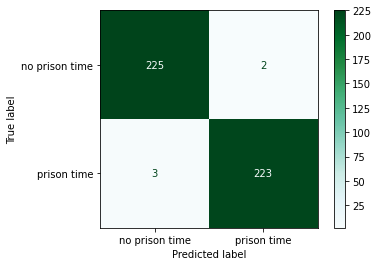

In [14]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# set up confusion matrix
cm = confusion_matrix(y_test,logreg.predict(X_test_ss))

# plot matrix
plot_confusion_matrix(logreg, X_test_ss, y_test, cmap='BuGn', display_labels=['no prison time', 'prison time']);

**These results are great for a model that has balanced classess. We would never want to tell the person/offender the incorrect probability of getting a prison sentence.**

In [15]:
# model with UN_balanced classes

#set up X/y
X = drugs.drop(columns='prisdum')
y = drugs['prisdum']

# set train/test split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, train_size=0.7, stratify=y)

# scale data
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.fit_transform(X_test)

# train multiple models
unbalanced_class_scores = classify(X_train_ss,X_test_ss,y_train,y_test)

In [16]:
unbalanced_class_scores

,Train Acc,Test Acc,Acc-diff,Train-F1,Test-F1,F1-diff,Train-Pres,Test-Pres,Pres-diff,Train_Recall,Test-Recall,Recall_diff
knn,0.998217,0.998614,0.000396,0.999067,0.999275,0.000208,0.999022,0.998757,0.000265,0.999111,0.999793,0.000681
logreg,0.998302,0.998217,0.000085,0.999111,0.999067,0.000044,0.999111,0.999170,0.000059,0.999111,0.998963,0.000148
dt,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
bag,1.000000,0.996039,0.003961,1.000000,0.997931,0.002069,1.000000,0.995870,0.004130,1.000000,1.000000,0.000000
bag_knn,0.997963,0.998416,0.000453,0.998933,0.999171,0.000238,0.999022,0.998757,0.000265,0.998845,0.999585,0.000741
bag_log,0.997793,0.997821,0.000028,0.998845,0.998860,0.000015,0.998667,0.998550,0.000118,0.999022,0.999171,0.000148
rf,1.000000,0.996039,0.003961,1.000000,0.997931,0.002069,1.000000,0.995870,0.004130,1.000000,1.000000,0.000000
et,1.000000,0.999406,0.000594,1.000000,0.999689,0.000311,1.000000,0.999585,0.000415,1.000000,0.999793,0.000207
ada,1.000000,0.996039,0.003961,1.000000,0.997931,0.002069,1.000000,0.995870,0.004130,1.000000,1.000000,0.000000
gboost,1.000000,0.996039,0.003961,1.000000,0.997931,0.002069,1.000000,0.995870,0.004130,1.000000,1.000000,0.000000


In [17]:
# import model
from sklearn.linear_model import LogisticRegression

# instantiate, train, evaluate
logreg = LogisticRegression()
logreg.fit(X_train_ss,y_train)
print(f"train acc: {logreg.score(X_train_ss,y_train)}")
print(f"test acc: {logreg.score(X_test_ss,y_test)}")

# create df to visualize coefs
logreg_scores = pd.DataFrame(columns=X.columns,data=logreg.coef_).T

train acc: 0.99830220713073
test acc: 0.9982174688057041


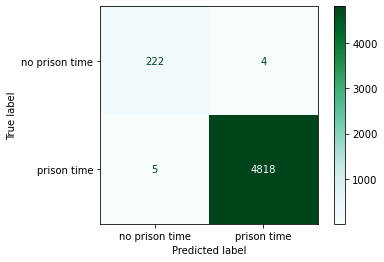

In [18]:
# set up confusion matrix
cm = confusion_matrix(y_test,logreg.predict(X_test_ss))

# plot matrix
plot_confusion_matrix(logreg, X_test_ss, y_test, cmap='BuGn', display_labels=['no prison time', 'prison time']);

**One of the other features is giving it away because the model should be misclassifying the minor class since the classes are very unbalanced. More EDA will be done to identify these features. The cm_plot basically states the model is predicting the minority class very well.**

## ```More Modeling```
---
1. After some eda was done on the dataset we discovered that the feature 'suprdum' is 0.74 correlated to the target variable 'prisdum'. Modeling excluding this feature will be done to see how the model performs. We're expecting the models to be worst without this feature. 

In [19]:
# model with UN_balanced classes and removal of highly correlated features

#set up X/y
X = drugs.drop(columns=['prisdum','suprdum'])
y = drugs['prisdum']

# set train/test split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, train_size=0.7, stratify=y)

# scale data
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.fit_transform(X_test)

# train multiple models
unbalanced_class_scores_1 = classify(X_train_ss,X_test_ss,y_train,y_test)

In [20]:
unbalanced_class_scores_1

,Train Acc,Test Acc,Acc-diff,Train-F1,Test-F1,F1-diff,Train-Pres,Test-Pres,Pres-diff,Train_Recall,Test-Recall,Recall_diff
knn,0.998132,0.998614,0.000481,0.999022,0.999275,0.000252,0.998934,0.998757,0.000176,0.999111,0.999793,0.000681
logreg,0.998132,0.998019,0.000113,0.999022,0.998963,0.000059,0.998934,0.998963,0.000030,0.999111,0.998963,0.000148
dt,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
bag,1.000000,0.996039,0.003961,1.000000,0.997931,0.002069,1.000000,0.995870,0.004130,1.000000,1.000000,0.000000
bag_knn,0.997963,0.998416,0.000453,0.998933,0.999171,0.000238,0.999022,0.998757,0.000265,0.998845,0.999585,0.000741
bag_log,0.997708,0.997623,0.000085,0.998800,0.998756,0.000044,0.998579,0.998343,0.000236,0.999022,0.999171,0.000148
rf,1.000000,0.995841,0.004159,1.000000,0.997827,0.002173,1.000000,0.995869,0.004131,1.000000,0.999793,0.000207
et,1.000000,0.999208,0.000792,1.000000,0.999585,0.000415,1.000000,0.999585,0.000415,1.000000,0.999585,0.000415
ada,1.000000,0.996039,0.003961,1.000000,0.997931,0.002069,1.000000,0.995870,0.004130,1.000000,1.000000,0.000000
gboost,1.000000,0.996039,0.003961,1.000000,0.997931,0.002069,1.000000,0.995870,0.004130,1.000000,1.000000,0.000000


In [21]:
# import model
from sklearn.linear_model import LogisticRegression

# instantiate, train, evaluate
logreg = LogisticRegression()
logreg.fit(X_train_ss,y_train)
print(f"train acc: {logreg.score(X_train_ss,y_train)}")
print(f"test acc: {logreg.score(X_test_ss,y_test)}")

# create df to visualize coefs
logreg_scores = pd.DataFrame(columns=X.columns,data=logreg.coef_).T

train acc: 0.9981324278438031
test acc: 0.9980194097841156


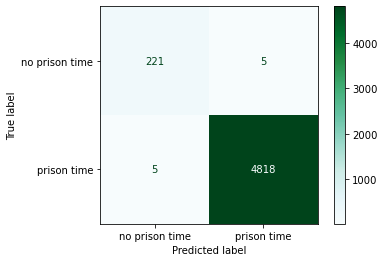

In [23]:
# set up confusion matrix
cm = confusion_matrix(y_test,logreg.predict(X_test_ss))

# plot matrix
plot_confusion_matrix(logreg, X_test_ss, y_test, cmap='BuGn', display_labels=['no prison time', 'prison time']);

**I've removed highly correlated features and the mdoel continues to predict very well despite classes being unbalanced. Further EDA needs to be done to check what's going on. Again, we're expecting the minority class to be misclassified at a high rate.**

## ```Notebook Conclusion```
---
1. The models trained with balanced classes performed as expected. Great score across the board.

2. The models trained with UNbalanced classes also performed well, which is not what we were expected. Further EDA needs to be done to find out why this model is classifying so well. Continue to the next modeling notebook -- **modeling_1**.